In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('..\Initial_data\K5P13\K5P13_cor.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_21520\940442110.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5P13\K5P13_cor.csv', ";")


,K0P125.PV,K5Q2_2.PV,K5FCV4_2I.PV,K5P6.PV,K5PCV6I.PV,K5PCV17_1I.PV,K5P17_1.PV,K5PCV17_2I.PV,K5P17_2.PV,K5F3.PV,...,K5T12.PV,K5P13.PV,K5HCV60I.PV,K5P16_1.PV,K5GKAL.PV,K5HCV61I.PV,K5P16_2.PV,K5FCV4_1I.PV,K5Q2_1.PV,K5P4_1.PV
0,65.0680,306.4375,3.578125,0.900526,98.01218,80.30844,6.307891,99.49062,6.050391,2159.500,...,146.0056,3.962700,97.84406,0.591758,15.72144,97.49750,0.672008,100.0,1118.125,12.03594
1,65.3215,555.0000,3.650312,0.899542,98.01718,80.36750,6.339375,99.49469,6.072500,2163.702,...,146.0044,3.965325,97.89719,0.589313,15.72836,97.48750,0.671820,100.0,1112.781,12.07938
2,65.4160,534.7188,3.488750,0.901530,98.02969,80.35875,6.351094,99.50313,6.092891,2165.970,...,146.0350,3.963337,97.93125,0.582937,15.70855,97.56750,0.663297,100.0,1118.156,12.12500
3,65.0355,521.5625,3.468125,0.900132,98.03313,80.35593,6.320000,99.49500,6.067657,2158.601,...,146.0437,3.965475,97.87218,0.602055,15.82219,97.50125,0.671211,100.0,1118.469,12.04438
4,64.6170,369.8125,3.480000,0.898715,98.01531,80.39063,6.260078,99.50188,6.017812,2150.234,...,145.9856,3.965212,97.93031,0.600578,15.77796,97.65594,0.665750,100.0,1117.750,11.95125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,65.1990,320.9063,6.546250,0.839672,98.15063,80.24532,6.052500,99.39500,5.808047,2108.120,...,143.5437,3.957244,97.88969,0.568023,15.66534,97.55687,0.630617,100.0,1074.000,11.56625
25916,64.8170,539.2500,6.505000,0.839573,98.17062,80.23750,6.001797,99.41312,5.759687,2100.337,...,143.5194,3.954694,97.83312,0.541391,15.59994,97.67344,0.634352,100.0,1083.563,11.45250
25917,64.5630,529.1563,6.510938,0.838983,98.16281,80.28094,5.957109,99.40469,5.708282,2094.165,...,143.5269,3.957169,97.86969,0.546367,15.47297,97.63593,0.619523,100.0,1079.500,11.38375
25918,64.2830,571.3438,6.538750,0.842881,98.17000,80.27219,5.950156,99.41312,5.702890,2090.260,...,143.5100,3.955875,97.85875,0.550469,15.44152,97.55437,0.626648,100.0,1081.563,11.35656


<Axes: >

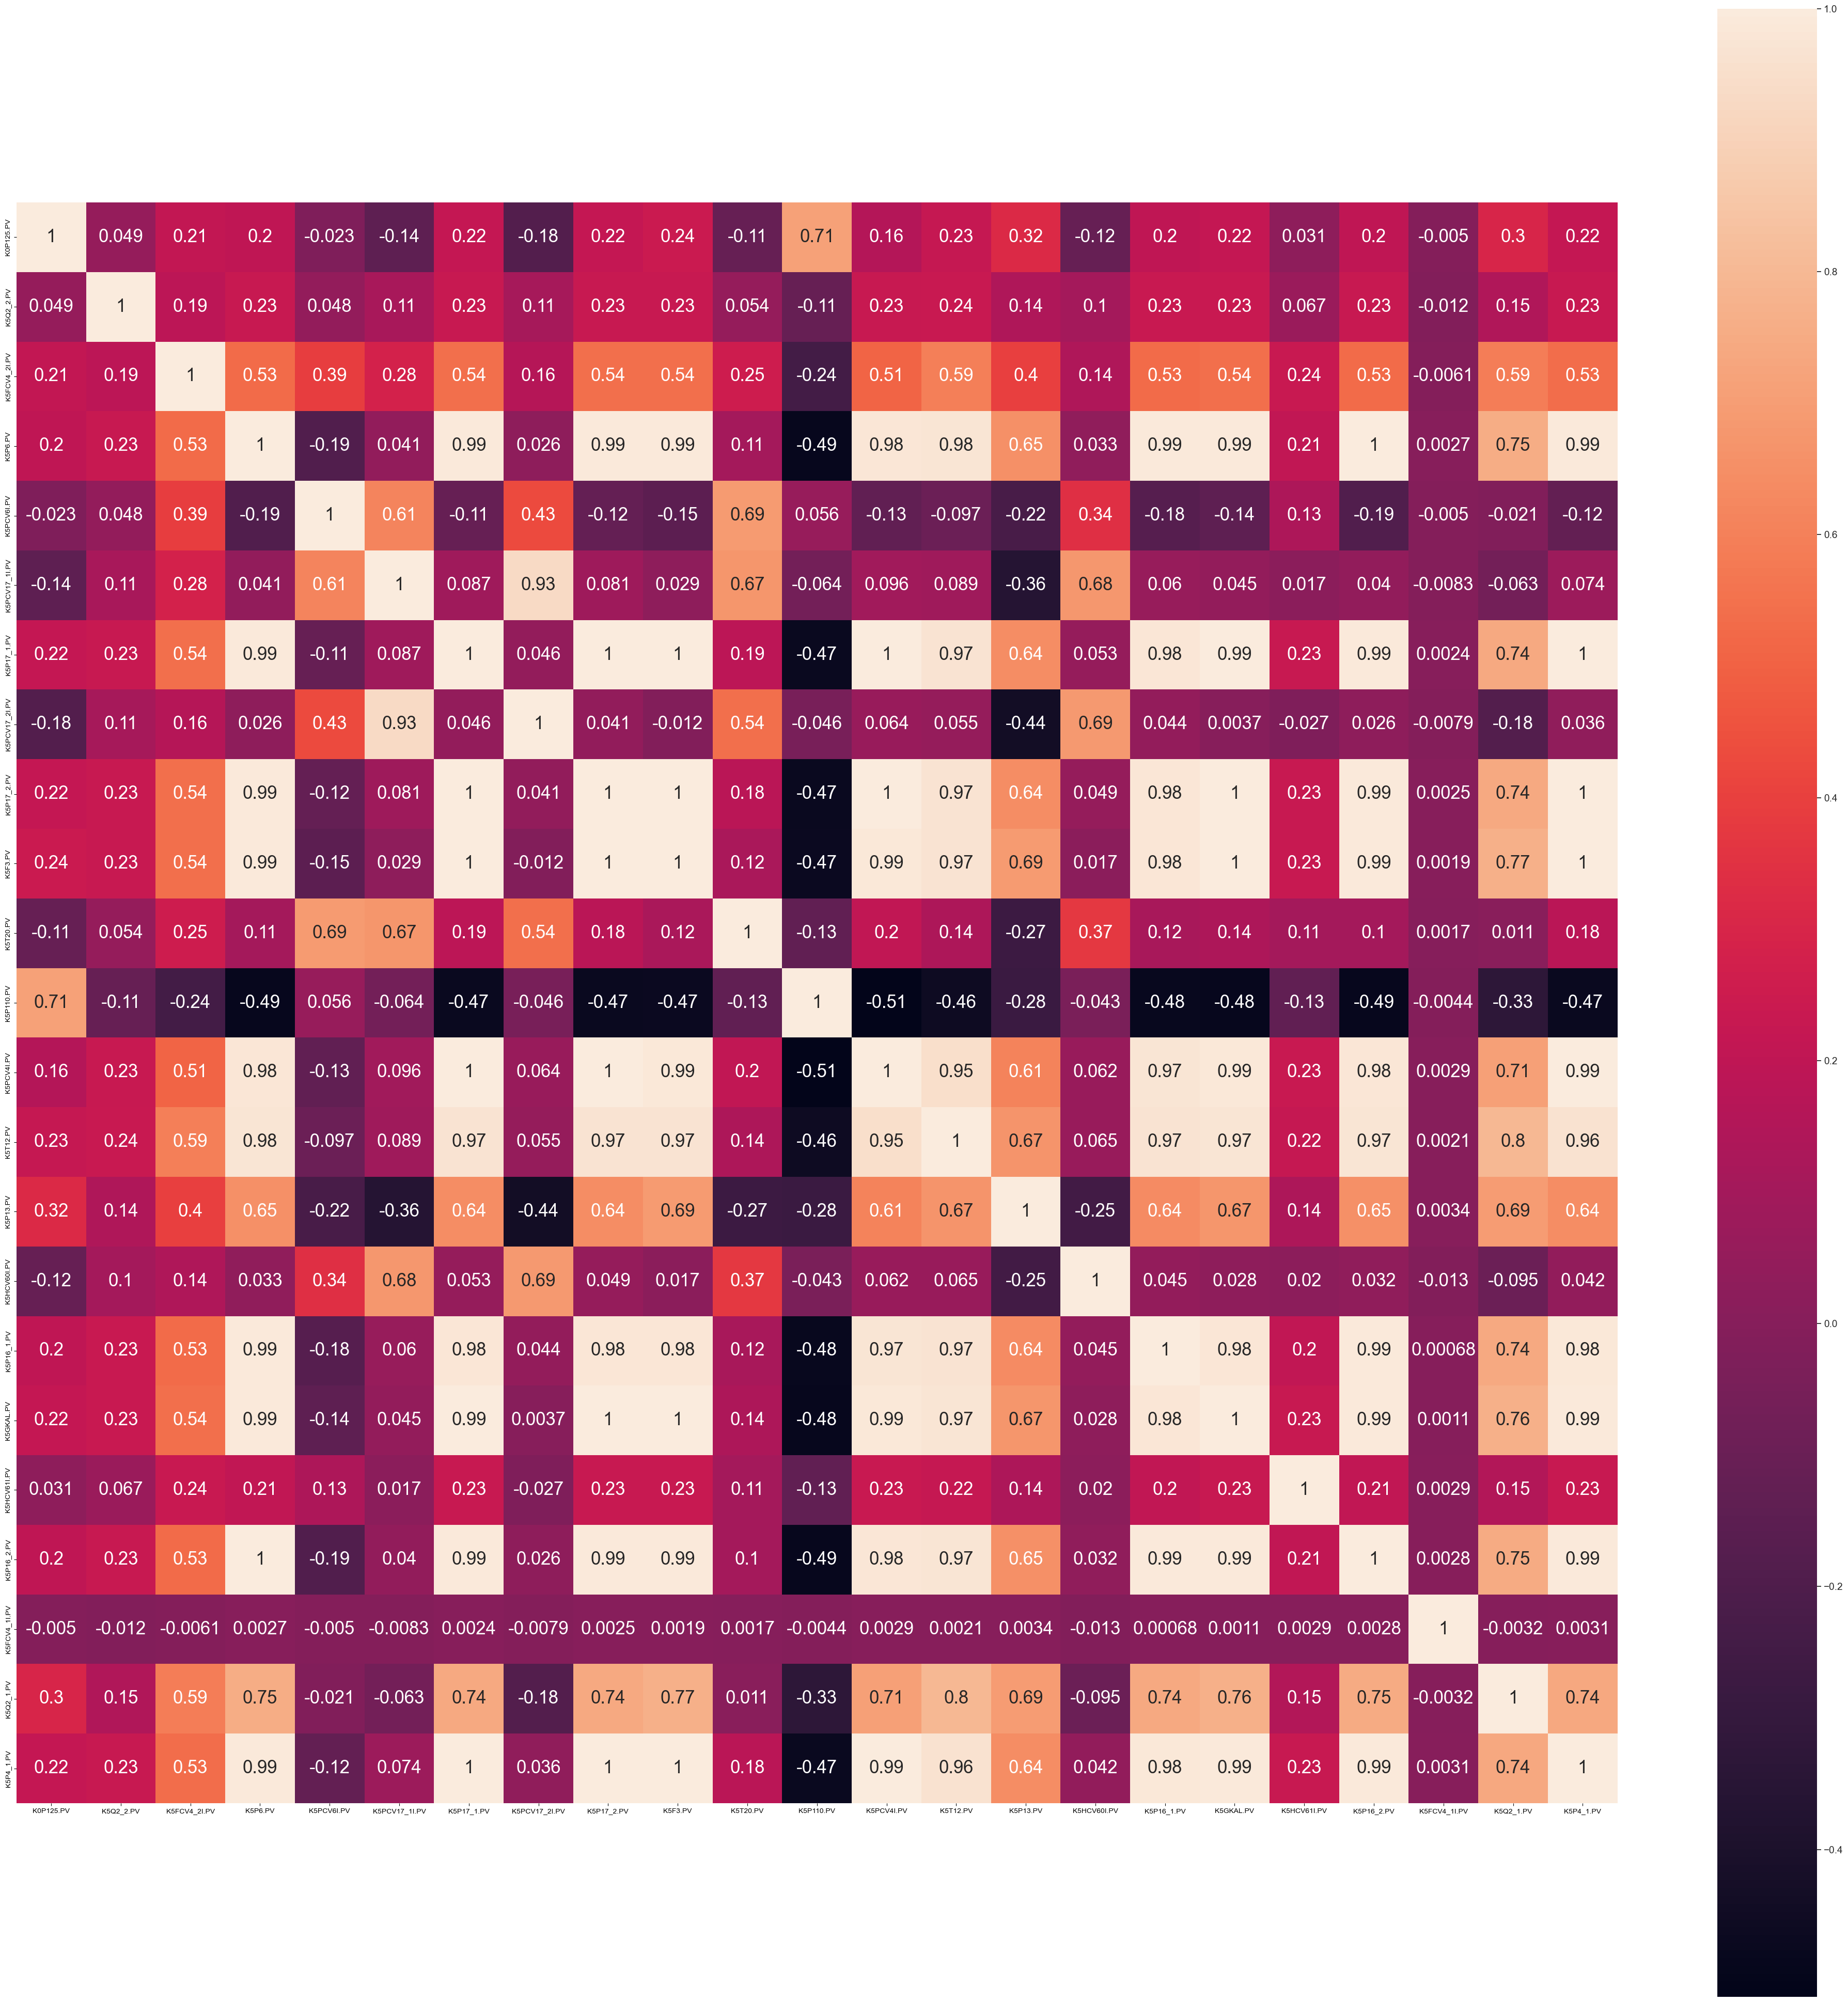

In [3]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [4]:
df = pd.read_csv('..\Initial_data\K5P13\K5P13.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_21520\3910241121.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5P13\K5P13.csv', ";")


,K5P6.PV,K5P17_1.PV,K5P17_2.PV,K5F3.PV,K5PCV4I.PV,K5T12.PV,K5P13.PV,K5P16_1.PV,K5GKAL.PV,K5P16_2.PV,K5Q2_1.PV,K5P4_1.PV
0,1.500175,9.530596,9.303347,2804.816,38.08671,167.9433,4.073233,1.015738,19.84652,1.126549,484.0471,17.993440
1,1.418568,9.114283,8.892303,2730.778,37.11661,166.2809,4.072107,0.956573,19.31243,1.065566,463.9162,17.135150
2,1.478407,9.554727,9.327216,2809.635,38.14972,167.2295,4.071414,1.000311,19.89875,1.110009,486.2339,17.982400
3,1.680137,10.316650,10.095040,2927.134,39.77588,171.2062,4.067364,1.139070,20.65832,1.260067,533.2946,19.499680
4,1.653008,10.317210,10.096680,2977.827,39.37015,169.4834,4.064949,1.117330,21.16503,1.242958,519.8514,19.379610
...,...,...,...,...,...,...,...,...,...,...,...,...
124,0.820174,5.741557,5.589488,2137.768,29.18794,146.3192,3.988866,0.532205,15.46932,0.624188,436.5425,11.001070
125,0.950118,6.553876,6.364776,2266.732,31.15253,153.3410,3.988124,0.631145,16.31466,0.715839,457.2440,12.497070
126,0.672425,4.939093,4.807625,1973.890,27.41206,144.9928,3.987130,0.434752,14.24277,0.513401,361.3033,9.537728
127,0.797697,5.583777,5.436651,2107.202,28.83019,146.3253,3.985844,0.515625,15.26145,0.607004,439.7661,10.711250


In [5]:
df=df.dropna()
df=df.round(5)
df=df.drop_duplicates(["K5P13.PV"])
df

,K5P6.PV,K5P17_1.PV,K5P17_2.PV,K5F3.PV,K5PCV4I.PV,K5T12.PV,K5P13.PV,K5P16_1.PV,K5GKAL.PV,K5P16_2.PV,K5Q2_1.PV,K5P4_1.PV
0,1.50018,9.53060,9.30335,2804.816,38.08671,167.9433,4.07323,1.01574,19.84652,1.12655,484.0471,17.99344
1,1.41857,9.11428,8.89230,2730.778,37.11661,166.2809,4.07211,0.95657,19.31243,1.06557,463.9162,17.13515
2,1.47841,9.55473,9.32722,2809.635,38.14972,167.2295,4.07141,1.00031,19.89875,1.11001,486.2339,17.98240
3,1.68014,10.31665,10.09504,2927.134,39.77588,171.2062,4.06736,1.13907,20.65832,1.26007,533.2946,19.49968
4,1.65301,10.31721,10.09668,2977.827,39.37015,169.4834,4.06495,1.11733,21.16503,1.24296,519.8514,19.37961
...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.64617,4.88842,4.76428,1971.471,27.33060,141.0578,3.98887,0.40853,14.34733,0.49496,339.3807,9.43802
125,0.95012,6.55388,6.36478,2266.732,31.15253,153.3410,3.98812,0.63115,16.31466,0.71584,457.2440,12.49707
126,0.67243,4.93909,4.80762,1973.890,27.41206,144.9928,3.98713,0.43475,14.24277,0.51340,361.3033,9.53773
127,0.79770,5.58378,5.43665,2107.202,28.83019,146.3253,3.98584,0.51562,15.26145,0.60700,439.7661,10.71125


In [6]:
y = df.drop(['K5P6.PV','K5P17_1.PV', 'K5P17_2.PV', 'K5F3.PV', 'K5PCV4I.PV', 'K5T12.PV' ,
             'K5P16_1.PV', 'K5GKAL.PV', 'K5P16_2.PV', 'K5Q2_1.PV', 'K5P4_1.PV'], axis=1)
x = df.drop(['K5P13.PV', 'K5GKAL.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)

In [7]:
lasso = MultiTaskLassoCV(cv=5, random_state=1).fit(X_train, y_train)
lasso.score(x, y)
clf = Ridge(alpha=1.5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.780353593503371

In [8]:
import pickle
filename = '../model/K5P13.sav'
pickle.dump(clf, open(filename, 'wb'))

In [9]:
loaded_model = pickle.load(open("../model/K5P13.sav", 'rb'))

In [10]:
task2 = {'K5P6.PV':[0.62],'K5P17_1.PV':[4.65], 'K5P17_2.PV':[4.53], 'K5F3.PV':[1921.048], 'K5PCV4I.PV':[26.8], 'K5T12.PV':[140] ,
             'K5P16_1.PV':[0.38], 'K5GKAL.PV':[13.97], 'K5P16_2.PV':[0.47], 'K5Q2_1.PV':[347.63], 'K5P4_1.PV':[9.00]}
df2 = pd.DataFrame(data=task2)
df2

,K5P6.PV,K5P17_1.PV,K5P17_2.PV,K5F3.PV,K5PCV4I.PV,K5T12.PV,K5P16_1.PV,K5GKAL.PV,K5P16_2.PV,K5Q2_1.PV,K5P4_1.PV
0,0.62,4.65,4.53,1921.048,26.8,140,0.38,13.97,0.47,347.63,9.0


In [11]:
loaded_model.predict(df2)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- K5GKAL.PV
